<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment4/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data

# Change the paths to where you have saved the input files.
path="/content/drive/MyDrive/machineLearning/Assignment4/"
#path="/content/drive/MyDrive/"

dfTrain = pd.read_excel(path+"Asssignment4_Data.xlsx", sheet_name= "Train")
dfTest  = pd.read_excel(path+"Asssignment4_Data.xlsx", sheet_name= "Test" )

In [4]:
# Make four numpy arrays for features and labels of the training and test sets.

xtrain = dfTrain.drop(["House ID", "Construction type"], axis=1).to_numpy()
xtest = dfTest.drop(["House ID", "Construction type"], axis=1).to_numpy()

labelsTrain = dfTrain.iloc[: , -1].to_numpy()
labelsTest = dfTest.iloc[: , -1].to_numpy()

b, ytrain = np.unique(labelsTrain, return_inverse=True)
#b2, ytest2 = np.unique(labelsTest, return_inverse=True)
ytest = np.zeros_like(labelsTest)
for i in range (len(b)):
  ytest[labelsTest==b[i]]= i
ytest = ytest.astype(np.int32)

features = dfTrain.drop(["House ID", "Construction type"], axis=1).columns.to_numpy()

In [5]:
# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX

# standardize features of the test set
xtestSt = (xtest - meanX) / stdX

In [6]:
# build and train the classifier

clf = DecisionTreeClassifier()#max_depth =3, random_state = 42
clf.fit(xtrainSt, ytrain)

DecisionTreeClassifier()

In [7]:
# use model to predict on the training and test sets

test_pred_decision_tree = clf.predict(xtestSt)
train_pred_decision_tree = clf.predict(xtrainSt)

# calculate the accuracy of the model
testAcc = metrics.accuracy_score(ytest, test_pred_decision_tree)
trainAcc = metrics.accuracy_score(ytrain, train_pred_decision_tree)

print("The accuracy on the training set: ", trainAcc)
print("The accuracy on the test set: ", testAcc)

The accuracy on the training set:  1.0
The accuracy on the test set:  0.4


**1. Use the default parameters.**

The default values are used.

**a. What is the accuracy on the training set?**

The accuracy on the training set is 1.0 and calculated in the above cell.

**b. What is the accuracy on the test set?**

The accuracy on the test set is 0.4 and calculated in the above cell.

In [8]:
# train models with different depths

accuraciesTrain = []
accuraciesTest = []
mds = range(1, 8)

for k in mds:

  clf = DecisionTreeClassifier(max_depth=k)
  clf.fit(xtrainSt, ytrain)

  # predicting
  test_pred_decision_tree = clf.predict(xtestSt)
  train_pred_decision_tree = clf.predict(xtrainSt)

  # calculate the accuracy of the model
  testAcc = metrics.accuracy_score(ytest, test_pred_decision_tree)
  trainAcc = metrics.accuracy_score(ytrain, train_pred_decision_tree)

  accuraciesTrain.append(trainAcc)
  accuraciesTest.append(testAcc)

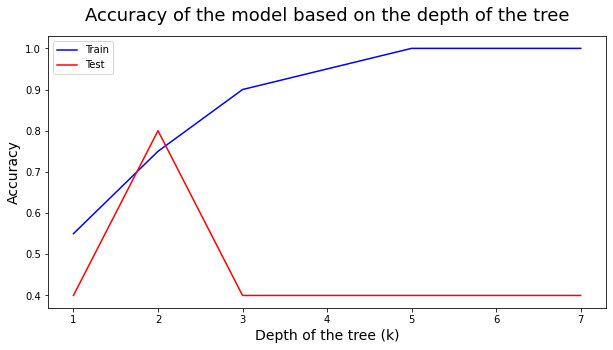

In [9]:
# Plotting accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(mds, accuraciesTrain, color='b', label="Train")
plt.plot(mds, accuraciesTest, color='r', label="Test")
plt.xlabel('Depth of the tree (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of the model based on the depth of the tree', fontsize=18, pad=15)
plt.legend()
plt.show()

**2. What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.**

Restericting the depth changes the bias and variance errors. The best depth is 2 since it gives more accurate prediction on the test set and simila accuracy on the training set. Increasing the depth will result in the overfitting and increasing the variance error. Decreasing the depth also gives high bias error.

**3. Why does restricting the depth have such a strong effect on the classifier performance?**

The complexity of a decision tree model is determined by the tree depth. More complex functions can be approximated by employing deeper trees. As a result, the performance on the training set is improved as the depth of the tree is increased. However, more complex models also make it easier to overfit the data. Increasing the depth too much leads to poor generalization. In other words, increasing depth reduces bias at the expense of increasing variance. Decreasing the depth also leads to higher bias since the complexity of models are reduced.

In [12]:
# Create a model with depth of 2 (the best model)
  
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(xtrainSt, ytrain)

# predicting
test_pred_decision_tree2 = clf2.predict(xtestSt)
train_pred_decision_tree2 = clf2.predict(xtrainSt)

# calculate the accuracy of the model
testAcc2 = metrics.accuracy_score(ytest, test_pred_decision_tree2)
trainAcc2 = metrics.accuracy_score(ytrain, train_pred_decision_tree2)

print("The accuracy on the training set for the best model (k=2): ", trainAcc2)
print("The accuracy on the test set for the best model (k=2): ", testAcc2)

The accuracy on the training set for the best model (k=2):  0.75
The accuracy on the test set for the best model (k=2):  0.8


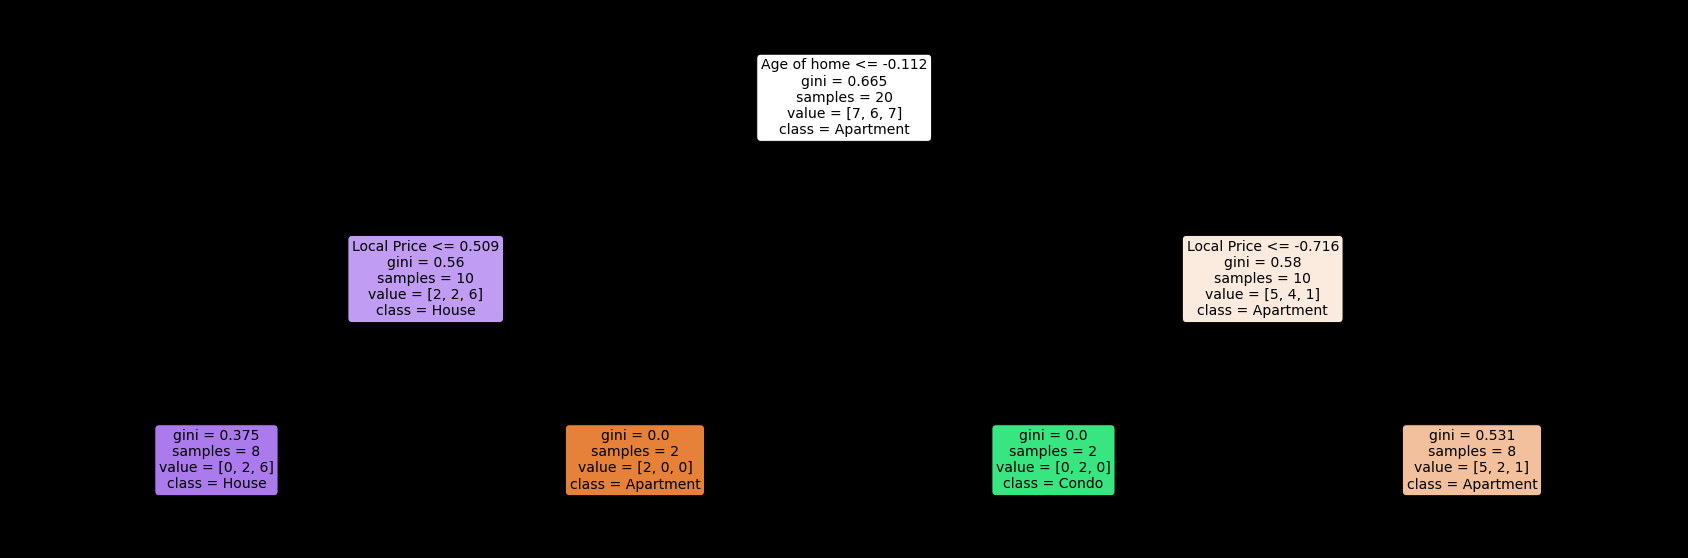

In [15]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf2,
                   #use the feature names stored
                   feature_names = features,
                   #use the class names stored
                   class_names = b,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [16]:
#export the decision rules
tree_rules = export_text(clf2,
                        feature_names = list(features))
#print the result
print(tree_rules)

|--- Age of home <= -0.11
|   |--- Local Price <= 0.51
|   |   |--- class: 2
|   |--- Local Price >  0.51
|   |   |--- class: 0
|--- Age of home >  -0.11
|   |--- Local Price <= -0.72
|   |   |--- class: 1
|   |--- Local Price >  -0.72
|   |   |--- class: 0



**4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following example:**

The above cells visualize the resulting tree.

Manually classify the new example by looking at the above figure. Since the model is trained after standardizing the trainig set, we must standardized the test set too. The below cell prints the standardized values of the test set. The first feature is the "age of home". The "age of home" is $-1.11667942$ and less than $-0.11$. Second feature is the "local price". The "local price" is $0.70805978$ and more than $0.51$. So, the prediction is Apartment (class:0).

In [20]:
# define the new test set
newxtest = np.array([[9.0384, 1, 7.8, 1.5, 1.5, 7, 3, 23]])
# standardize features of the new test set
newxtestSt = (newxtest - meanX) / stdX
print("Standardized of the new test set: ",newxtestSt)

Standardized of the new test set:  [[ 0.70805978 -0.4888129   0.60717226  0.03268433  0.45485883  0.33333333
  -0.32616404 -1.11667942]]


The bellow cell provides a classification for the given example using predict function of the scikit learn package.

In [21]:
newtest_pred_decision_tree3 = clf2.predict(newxtestSt)
print(b[newtest_pred_decision_tree3])

['Apartment']
